In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
from plotly.offline import init_notebook_mode
import re
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import spacy

nltk.download('omw-1.4')
tqdm.pandas()
spacy_eng = spacy.load("en_core_web_sm")
nltk.download('stopwords')
lemm = WordNetLemmatizer()
init_notebook_mode(connected=True)
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 18

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/유사도 모델/뉴스내용정제_추가_유사도측정_231108_ver7.xlsx')

In [ ]:
data = data[['게시물내용','뉴스내용_불용어제거', 'similarity']]

Remove Null Values

In [ ]:
data.isnull().sum()

게시물내용         9
뉴스내용_불용어제거    6
similarity    0
dtype: int64

In [ ]:
data['게시물내용'] = data['게시물내용'].replace(' ', np.nan)

In [ ]:
data['뉴스내용_불용어제거'] = data['뉴스내용_불용어제거'].replace(' ', np.nan)

In [ ]:
data['게시물내용'] = data['게시물내용'].replace('-', np.nan)

In [ ]:
data['뉴스내용_불용어제거'] = data['뉴스내용_불용어제거'].replace('-', np.nan)

In [ ]:
data.isnull().sum()

게시물내용         845
뉴스내용_불용어제거     15
similarity      0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446 entries, 0 to 5305
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   게시물내용       4446 non-null   object
 1   뉴스내용_불용어제거  4446 non-null   object
 2   similarity  4446 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 138.9+ KB


In [ ]:
def text_cleaning(x):

    questions = re.sub('\s+\n+', ' ', x)
    questions = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힝0-9]', ' ', questions)
    questions = questions.lower()

    return questions

In [ ]:
data['게시물내용_cleaned'] = data['게시물내용'].progress_apply(text_cleaning)
data['뉴스내용_cleaned'] = data['뉴스내용_불용어제거'].progress_apply(text_cleaning)
data

100%|██████████| 4446/4446 [00:01<00:00, 2716.71it/s]


,게시물내용,뉴스내용_불용어제거,similarity,게시물내용_cleaned,뉴스내용_cleaned
0,검찰 아태협 회장 경기도 보조금 13억 횡령해 생활비 유흥비 사용 검찰은 2018 ...,사진 연합뉴스 쌍방울그룹의 대북 송금 의혹 중심에 있는 아태평화교류협회 아태협 안모...,0,검찰 아태협 회장 경기도 보조금 13억 횡령해 생활비 유흥비 사용 검찰은 2018 ...,사진 연합뉴스 쌍방울그룹의 대북 송금 의혹 중심에 있는 아태평화교류협회 아태협 안모...
1,IPO 쉽지 않네 글로벌 투자유치 역풍 맞은 유니콘 https n news nave...,글로벌 투자유치 명과 암 국내 기업들 IPO 엑시트 급제동분위기 싸늘해진 글로벌투자...,0,쉽지 않네 글로벌 투자유치 역풍 맞은 유니콘 ...,글로벌 투자유치 명과 암 국내 기업들 엑시트 급제동분위기 싸늘해진 글로벌투자...
2,올리패스 내년초 비마약성 진통제 중간값 발표 출처 이데일리 이광수기자 2022 11...,내년 2월 2단계 임상 결과 공식 발표 예정 글로벌 제약사들도 데이터 기다리는 중 ...,0,올리패스 내년초 비마약성 진통제 중간값 발표 출처 이데일리 이광수기자 2022 11...,내년 2월 2단계 임상 결과 공식 발표 예정 글로벌 제약사들도 데이터 기다리는 중 ...
3,이데일리 김화빈 기자 유튜브 채널에 출연해 과거 한 나이트클럽에서 만난 쥴리 가 윤...,이데일리 김화빈 기자 유튜브 채널에 출연해 과거 한 나이트클럽에서 만난 쥴리 가 윤...,0,이데일리 김화빈 기자 유튜브 채널에 출연해 과거 한 나이트클럽에서 만난 쥴리 가 윤...,이데일리 김화빈 기자 유튜브 채널에 출연해 과거 한 나이트클럽에서 만난 쥴리 가 윤...
4,금산군의회 김기윤 산업건설위원장 인터뷰가 충청투데이 지면에 게재되었습니다 신문 지면...,금산군의회 산업건설위원회 김기윤 위원장 김기윤 금산군의회 산업건설위원장 사진 금산군...,0,금산군의회 김기윤 산업건설위원장 인터뷰가 충청투데이 지면에 게재되었습니다 신문 지면...,금산군의회 산업건설위원회 김기윤 위원장 김기윤 금산군의회 산업건설위원장 사진 금산군...
...,...,...,...,...,...
5301,조회수 736 330회 2022 5 19 손웅정 감독은 최근 스포츠경향과의 단독 인...,화려한 기술보다 훌륭한 인성 먼저 강조흥민이도 기본기 배우는 데 7년 걸려 왼발 잊...,0,조회수 736 330회 2022 5 19 손웅정 감독은 최근 스포츠경향과의 단독 인...,화려한 기술보다 훌륭한 인성 먼저 강조흥민이도 기본기 배우는 데 7년 걸려 왼발 잊...
5302,조회수 8회 2022 6 15 한겨레신문 2022년 6월 15일자 지평견문 구독자 ...,화물연대의 총파업 8일째인 14일 밤 경기도 의왕시 내륙컨테이너기지 ICD 에서 열...,0,조회수 8회 2022 6 15 한겨레신문 2022년 6월 15일자 지평견문 구독자 ...,화물연대의 총파업 8일째인 14일 밤 경기도 의왕시 내륙컨테이너기지 에서 열...
5303,조회수 271회 2022 4 16 머니투데이기자 머니투데이 차유채기자 머니투데이기자...,화제를 모은 한동훈 법무부 장관 후보자 패션 사진 뉴스1 온라인 커뮤니티 에펨코리아...,0,조회수 271회 2022 4 16 머니투데이기자 머니투데이 차유채기자 머니투데이기자...,화제를 모은 한동훈 법무부 장관 후보자 패션 사진 뉴스1 온라인 커뮤니티 에펨코리아...
5304,조회수 472회 2022 3 25 고성여행 고성8경 화진포 강원화진포 화진8경 겨울...,화진포 고성 화진팔경 화진포호는 둘레가 약 16 에 달해 우리나라 석호 중 최대 규...,0,조회수 472회 2022 3 25 고성여행 고성8경 화진포 강원화진포 화진8경 겨울...,화진포 고성 화진팔경 화진포호는 둘레가 약 16 에 달해 우리나라 석호 중 최대 규...


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4446 entries, 0 to 5305
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   게시물내용          4446 non-null   object
 1   뉴스내용_불용어제거     4446 non-null   object
 2   similarity     4446 non-null   int64 
 3   게시물내용_cleaned  4446 non-null   object
 4   뉴스내용_cleaned   4446 non-null   object
dtypes: int64(1), object(4)
memory usage: 208.4+ KB


In [ ]:
data['게시물내용_lens'] = data['게시물내용_cleaned'].apply(lambda x: len(x.split()))
data['뉴스내용_lens'] = data['뉴스내용_cleaned'].apply(lambda x: len(x.split()))

In [ ]:
sns_content = data['게시물내용_cleaned'].tolist()
news_content = data['뉴스내용_cleaned'].tolist()

In [ ]:
data['게시물내용_lens'].describe()

count    4446.000000
mean      180.397436
std       240.022530
min         1.000000
25%        41.000000
50%        98.000000
75%       239.000000
max      5271.000000
Name: 게시물내용_lens, dtype: float64

In [ ]:
data['뉴스내용_lens'].describe()

count    4446.000000
mean      355.131354
std       295.482219
min         0.000000
25%       176.000000
50%       297.000000
75%       437.000000
max      5115.000000
Name: 뉴스내용_lens, dtype: float64

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

모델링

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.5 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, Layer, Dense, Dropout, MultiHeadAttention, LayerNormalization, Input, GlobalAveragePooling1D
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer,DataCollatorWithPadding,TFAutoModel,DistilBertConfig,TFDistilBertModel, BertConfig, TFBertModel, TFRobertaModel
from datasets import load_dataset

In [ ]:
#model_checkpoint = 'bert-base-uncased' #영어 모델
model_checkpoint = 'bert-base-multilingual-cased' #한국어 모델
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig

In [ ]:
sentences = data['뉴스내용_cleaned']

In [ ]:
sentences2 = data['게시물내용_cleaned']

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
tokenized_texts2 = [tokenizer.tokenize(sent) for sent in sentences2]


In [ ]:
sentences = sentences.tolist()

In [ ]:
sentences2 = sentences2.tolist()

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

def encode_text(text, tokenizer):

    encoded = tokenizer.batch_encode_plus(
        text,
        add_special_tokens=True,
        max_length=120,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors="tf",
    )
    return encoded

In [ ]:
data = data.sample(4446)
train = data.iloc[:int(4446*0.80),:]
val = data.iloc[int(4446*0.80):,:]

X1_train = encode_text(train['게시물내용_cleaned'].tolist(), tokenizer)
X2_train = encode_text(train['뉴스내용_cleaned'].tolist(), tokenizer)
X1_val = encode_text(val['게시물내용_cleaned'].tolist(), tokenizer)
X2_val = encode_text(val['뉴스내용_cleaned'].tolist(), tokenizer)

y_train = train['similarity'].values
y_val = val['similarity'].values

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    BATCH_SIZE = strategy.num_replicas_in_sync * 4
    print("Running on TPU:", tpu.master())
    print(f"Batch Size: {BATCH_SIZE}")

except ValueError:
    strategy = tf.distribute.get_strategy()
    BATCH_SIZE = 32
    print(f"Running on {strategy.num_replicas_in_sync} replicas")
    print(f"Batch Size: {BATCH_SIZE}")

Running on 1 replicas
Batch Size: 32


In [ ]:
class L1Dist(Layer):

    def __init__(self,**kwargs):
        super().__init__()

    def call(self,embedding1,embedding2):
        return tf.math.abs(embedding1 - embedding2)

In [ ]:
with strategy.scope():
    transformer_model = TFBertModel.from_pretrained(model_checkpoint)

    input_ids_in1 = Input(shape=(None,),name='input_ids1', dtype='int32')
    input_masks_in1 = Input(shape=(None,), name='attention_mask1', dtype='int32')
    input_ids_in2 = Input(shape=(None,),name='input_ids2', dtype='int32')
    input_masks_in2 = Input(shape=(None,), name='attention_mask2', dtype='int32')

    embedding_layer1 = transformer_model(input_ids_in1, attention_mask=input_masks_in1).last_hidden_state
    embedding_layer2 = transformer_model(input_ids_in2, attention_mask=input_masks_in2).last_hidden_state

    embedding1 = GlobalAveragePooling1D()(embedding_layer1) #GlobalAveragePooling1D 레이어는 고정된 크기의 출력 벡터를 리턴한다.
    embedding2 = GlobalAveragePooling1D()(embedding_layer2)
    l1_dist = L1Dist()(embedding1,embedding2)

    x = Dense(512, activation='relu')(l1_dist) # 뉴런이 512개인 fully-connected layer(Dense)에 입력 벡터 통과 시킴 -> 크기 512인 벡터 출력
    output = Dense(1, activation='sigmoid')(x) # 마지막 층은 하나의 노드로 구성된 출력 레이어에 fully-connected하게 연결시킴 --> sigmoid 함수는 출력이 0~1 사이의 실수값을 갖도록 한다.

    model = Model(inputs=[input_ids_in1, input_masks_in1, input_ids_in2, input_masks_in2], outputs = output)
    # 손실함수로 binary_crossentropy 사용 -> 확률 분포간의 거리 측정
    # 성능 평가를 위해서 정확도 사용
    model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),metrics='accuracy')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
for layer in model.layers[:5]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids1 (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 attention_mask1 (InputLaye  [(None, None)]               0         []                            
 r)                                                                                               
                                                                                                  
 input_ids2 (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 attention_mask2 (InputLaye  [(None, None)]               0         []                        

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=3,
                                            verbose=1,
                                            factor=0.3,
                                            min_lr=0.00000001)

In [ ]:
history = model.fit((np.asarray(X1_train['input_ids']),np.asarray(X1_train['attention_masks']),np.asarray(X2_train['input_ids']),np.asarray(X2_train['attention_masks'])),
                    y_train, batch_size=BATCH_SIZE, epochs=5,
                    validation_data=((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])), y_val),
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/5


112/112 [==============================] - 256s 2s/step - loss: 0.4909 - accuracy: 0.6718 - val_loss: 0.4124 - val_accuracy: 0.7652 - lr: 1.0000e-05
Epoch 2/5
112/112 [==============================] - 190s 2s/step - loss: 0.3893 - accuracy: 0.8096 - val_loss: 0.3604 - val_accuracy: 0.8427 - lr: 1.0000e-05
Epoch 3/5
112/112 [==============================] - 189s 2s/step - loss: 0.3109 - accuracy: 0.8737 - val_loss: 0.3376 - val_accuracy: 0.8685 - lr: 1.0000e-05
Epoch 4/5
112/112 [==============================] - 189s 2s/step - loss: 0.2530 - accuracy: 0.9024 - val_loss: 0.3452 - val_accuracy: 0.8596 - lr: 1.0000e-05
Epoch 5/5
112/112 [==============================] - 189s 2s/step - loss: 0.1853 - accuracy: 0.9328 - val_loss: 0.3689 - val_accuracy: 0.8573 - lr: 1.0000e-05


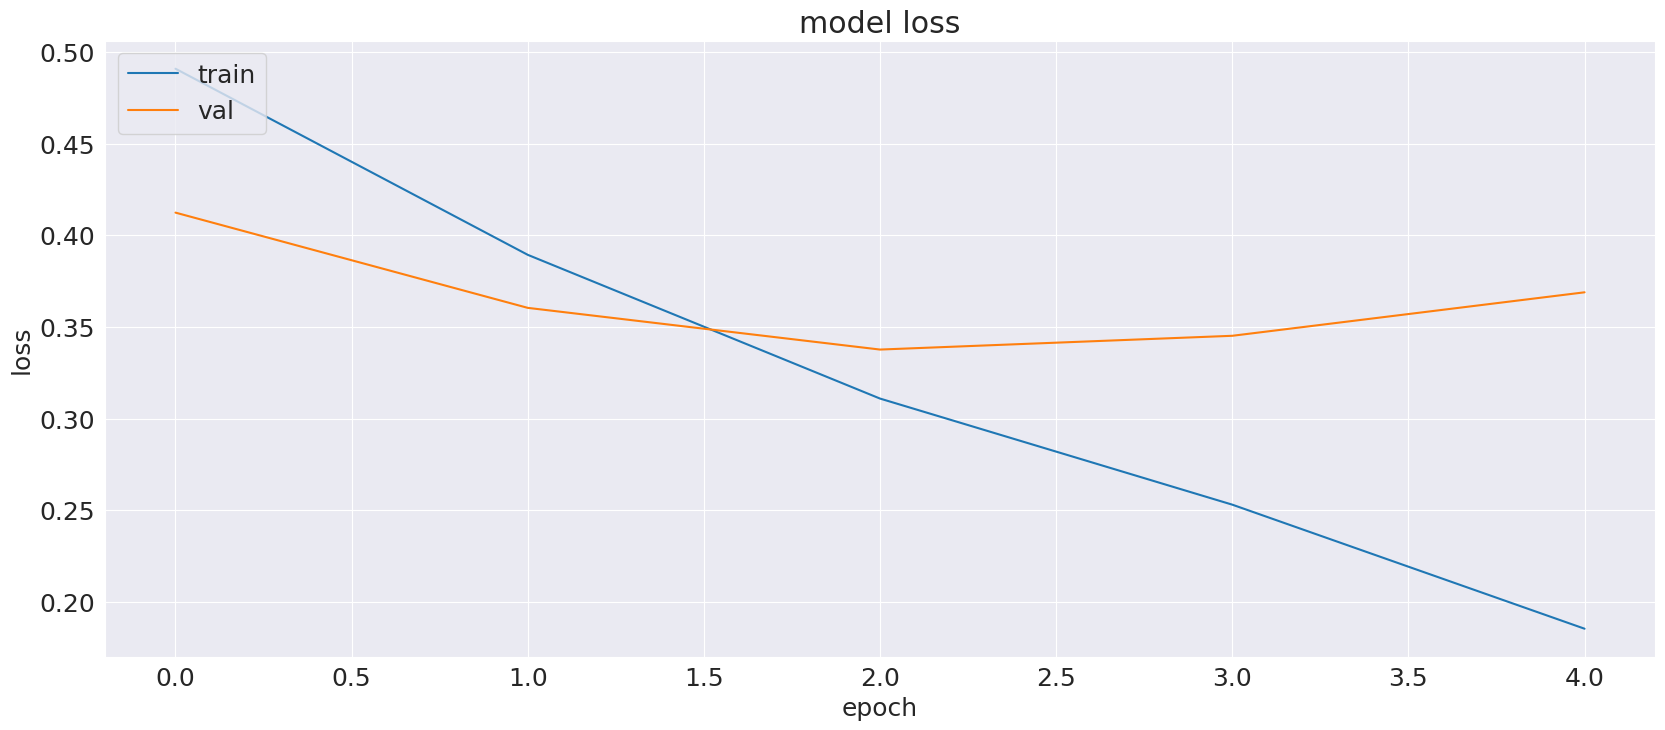

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

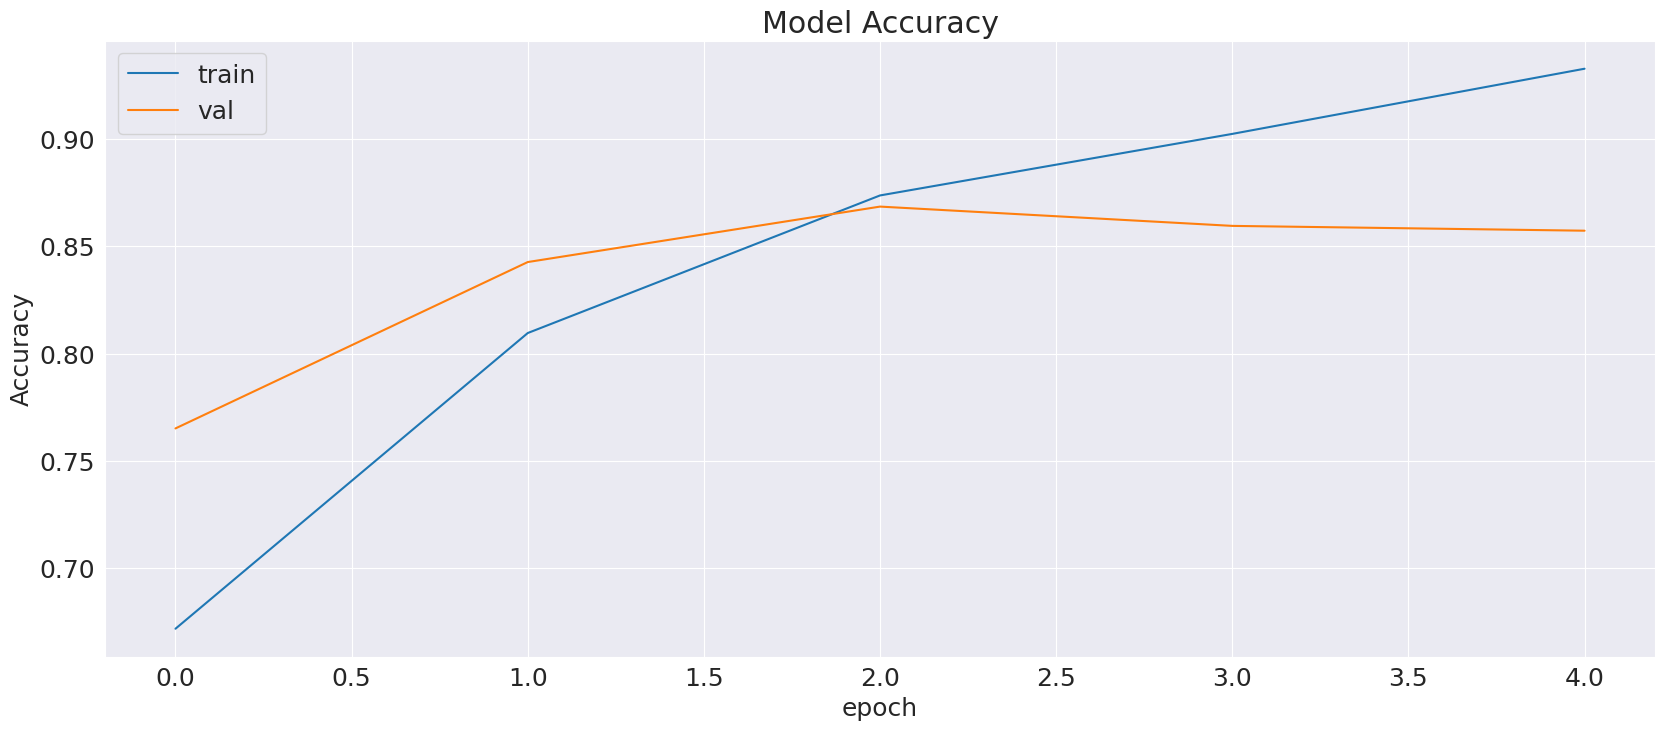

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# batch size = 32. epochs = 10
history = model.fit((np.asarray(X1_train['input_ids']),np.asarray(X1_train['attention_masks']),np.asarray(X2_train['input_ids']),np.asarray(X2_train['attention_masks'])),
                    y_train, batch_size=BATCH_SIZE, epochs=10,
                    validation_data=((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])), y_val),
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/10
112/112 [==============================] - 190s 2s/step - loss: 0.1300 - accuracy: 0.9575 - val_loss: 0.3920 - val_accuracy: 0.8685 - lr: 1.0000e-05
Epoch 2/10
112/112 [==============================] - 189s 2s/step - loss: 0.0922 - accuracy: 0.9719 - val_loss: 0.4347 - val_accuracy: 0.8685 - lr: 1.0000e-05
Epoch 3/10
112/112 [==============================] - 189s 2s/step - loss: 0.0655 - accuracy: 0.9828 - val_loss: 0.5079 - val_accuracy: 0.8584 - lr: 1.0000e-05
Epoch 4/10
112/112 [==============================] - ETA: 0s - loss: 0.0588 - accuracy: 0.9834
Epoch 4: ReduceLROnPlateau reducing learning rate to 2.9999999242136253e-06.
112/112 [==============================] - 189s 2s/step - loss: 0.0588 - accuracy: 0.9834 - val_loss: 0.5450 - val_accuracy: 0.8764 - lr: 1.0000e-05
Epoch 5/10
112/112 [==============================] - 182s 2s/step - loss: 0.0436 - accuracy: 0.9893 - val_loss: 0.5502 - val_accuracy: 0.8663 - lr: 3.0000e-06
Epoch 6/10
112/112 [==================

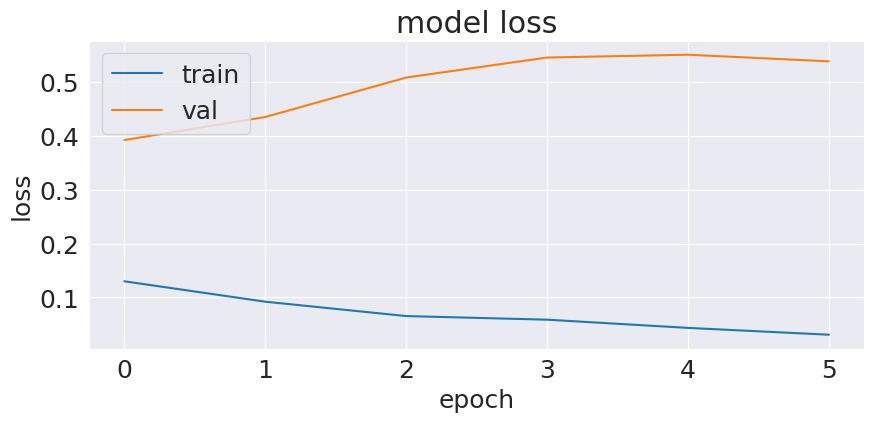

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

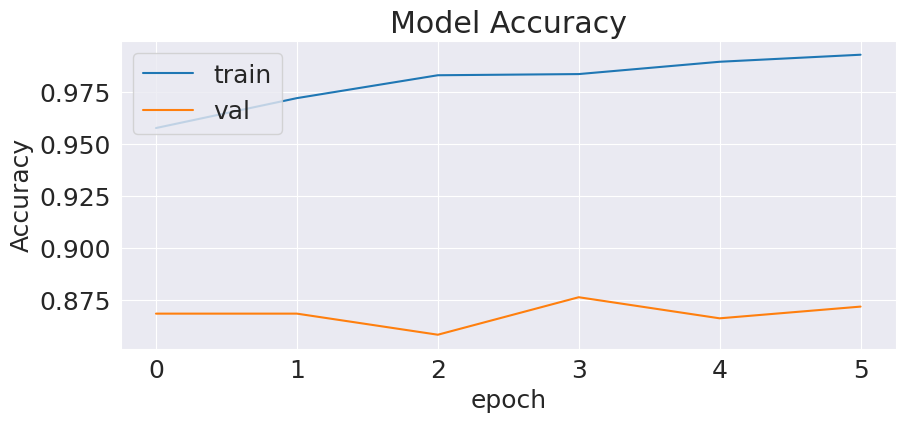

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

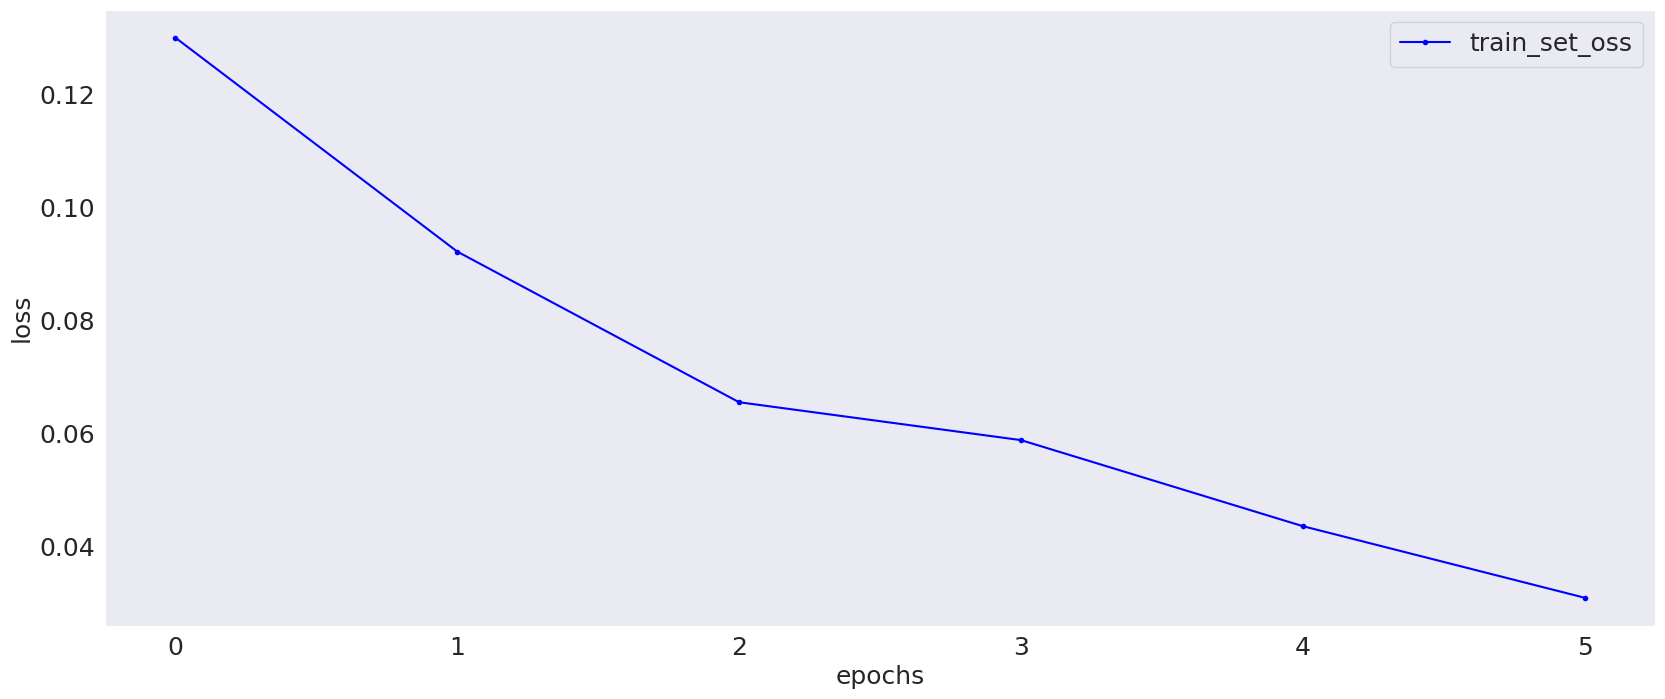

In [ ]:
#y_vloss = hist.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

#plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

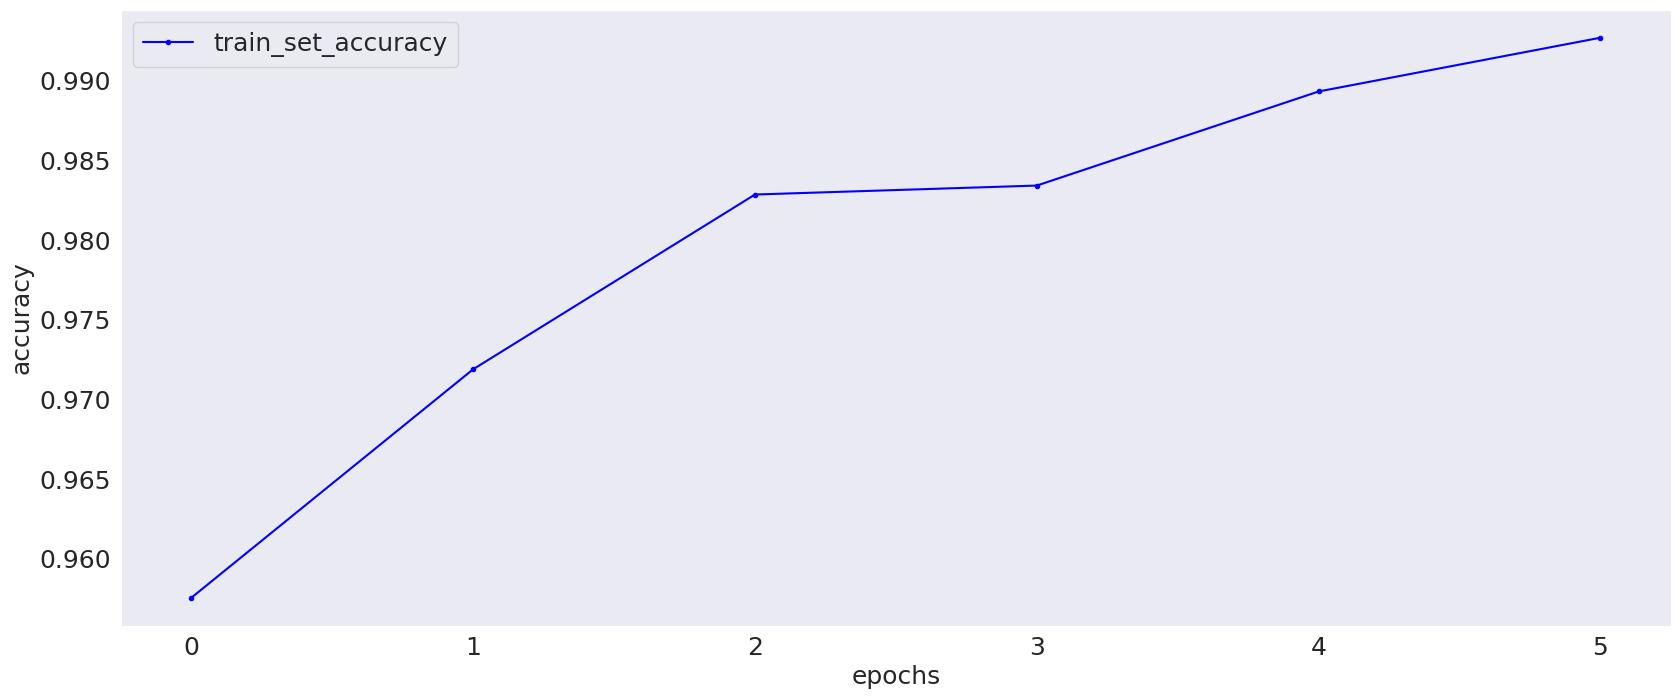

In [ ]:
#y_vloss = hist.history['val_acc']
y_loss = history.history['accuracy']

x_len = np.arange(len(y_loss))

#plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [ ]:
y_pred = model.predict((np.asarray(X1_val['input_ids']),np.asarray(X1_val['attention_masks']),np.asarray(X2_val['input_ids']),np.asarray(X2_val['attention_masks'])))

28/28 [==============================] - 21s 493ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score

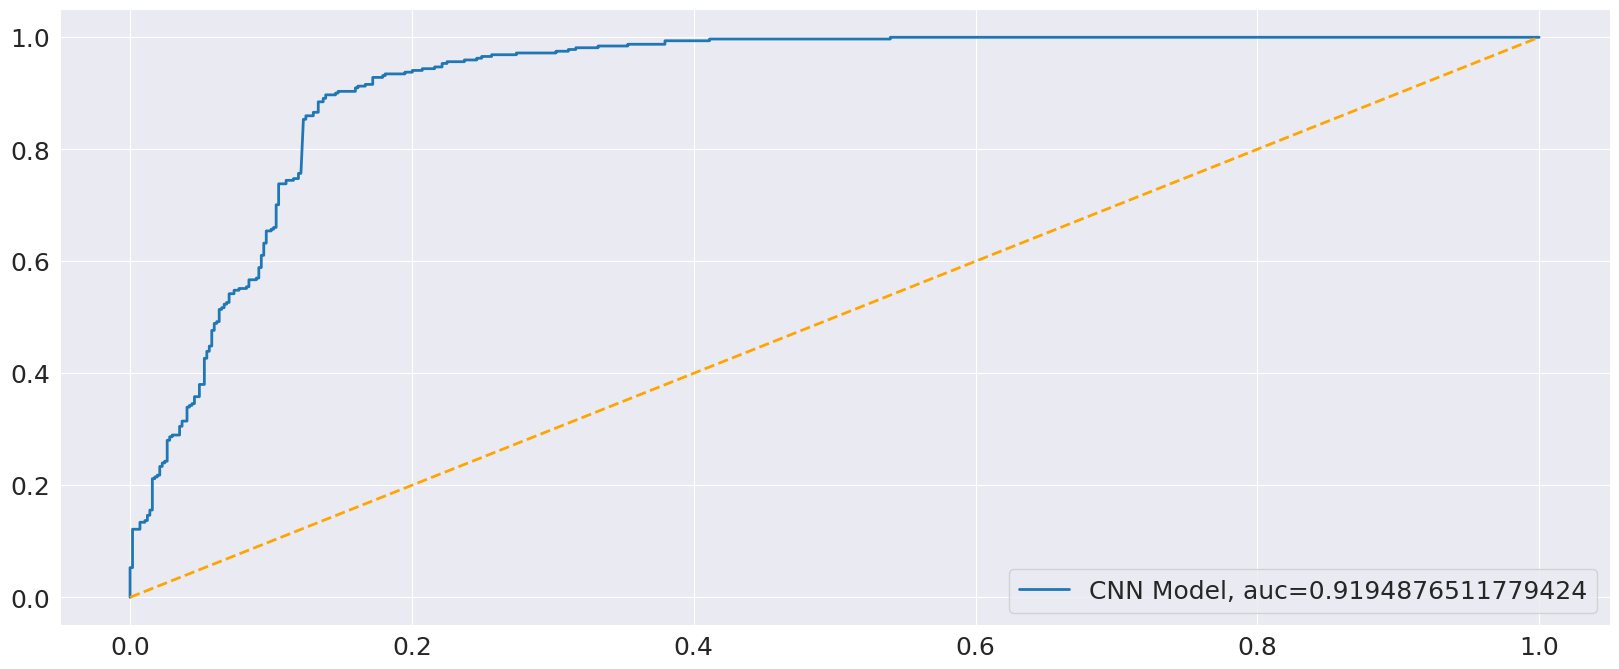

In [ ]:
plt.figure(figsize=(20,8))
fpr, tpr, _ = roc_curve(y_val,  y_pred)
auc = roc_auc_score(y_val, y_pred)
plt.plot(fpr,tpr,label="CNN Model, auc="+str(auc),lw=2)
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.legend(loc=4)
plt.show()


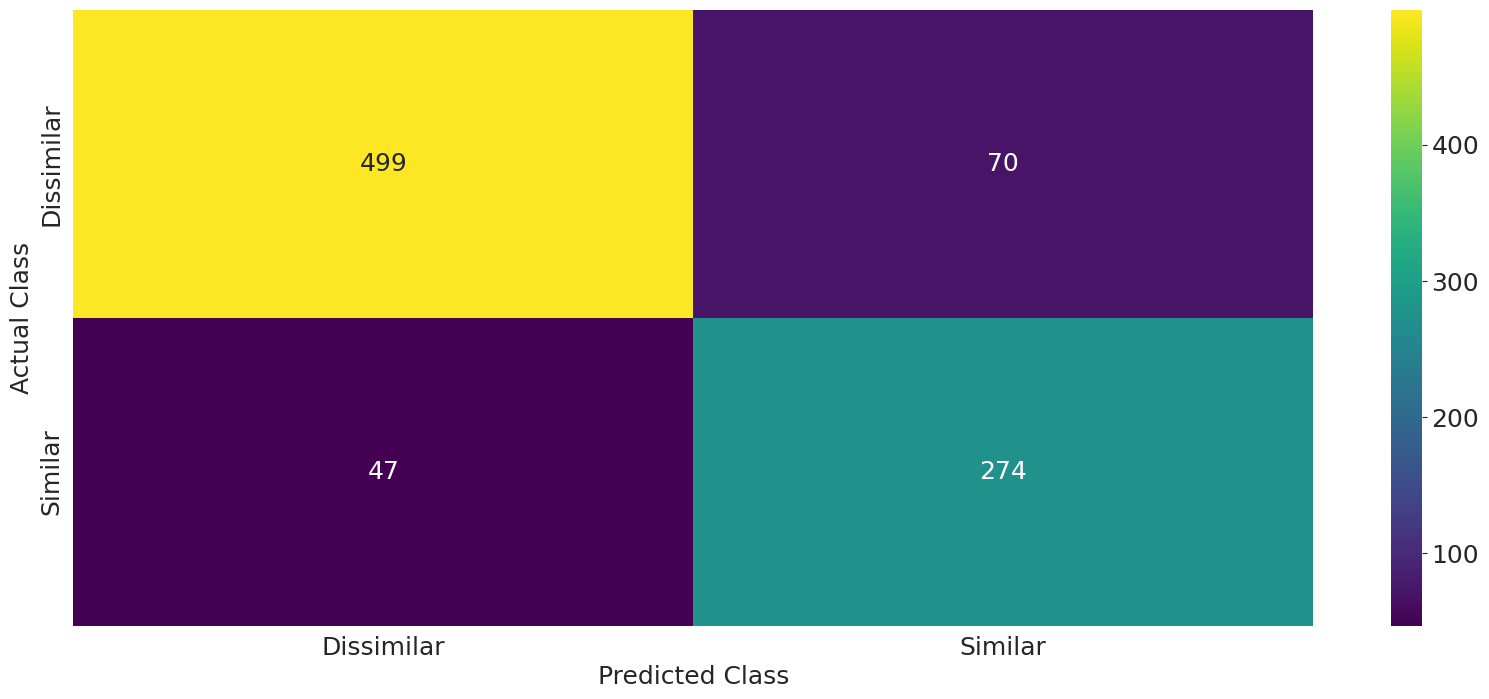

In [ ]:
y_pred[y_pred>=0.5] = 1
y_pred[y_pred<0.5] = 0

sns.heatmap(confusion_matrix(y_val, y_pred),cmap='viridis',annot=True,fmt='.5g',
            xticklabels=['Dissimilar','Similar'],yticklabels=['Dissimilar','Similar'])
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

In [ ]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       569
           1       0.80      0.85      0.82       321

    accuracy                           0.87       890
   macro avg       0.86      0.87      0.86       890
weighted avg       0.87      0.87      0.87       890

